In [1]:
import numpy as np
import pandas as pd 
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score # other metrics are allowed here.

## Data Pre-Processing

In [2]:
# Read in the csv file
df = pd.read_csv('cleveland.csv')
df

Unnamed: 0   age  sex   cp  trestbps   chol  fbs  restecg  thalach  \
0             0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0   
1             1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0   
2             2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0   
3             3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0   
4             4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0   
..          ...   ...  ...  ...       ...    ...  ...      ...      ...   
298         298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0   
299         299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0   
300         300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0   
301         301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0   
302         302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0   

     exang  oldpeak  slope   ca  thal  target  
0      0.0      2.3    3.0  0.0   6.0       0  
1      1.0      1.5    2.0  3.0   3.0       2  
2      1.0      2.6    2.0  2.0   7.0       1  
3      0.0      3.5    3.0  0.0   3.0       0  
4      0.0      1.4    1.0  0.0   3.0       0  
..     ...      ...    ...  ...   ...     ...  
298    0.0      1.2    2.0  0.0   7.0       1  
299    0.0      3.4    2.0  2.0   7.0       2  
300    1.0      1.2    2.0  1.0   7.0       3  
301    0.0      0.0    2.0  1.0   3.0       1  
302    0.0      0.0    1.0  0.0   3.0       0  

[303 rows x 15 columns]

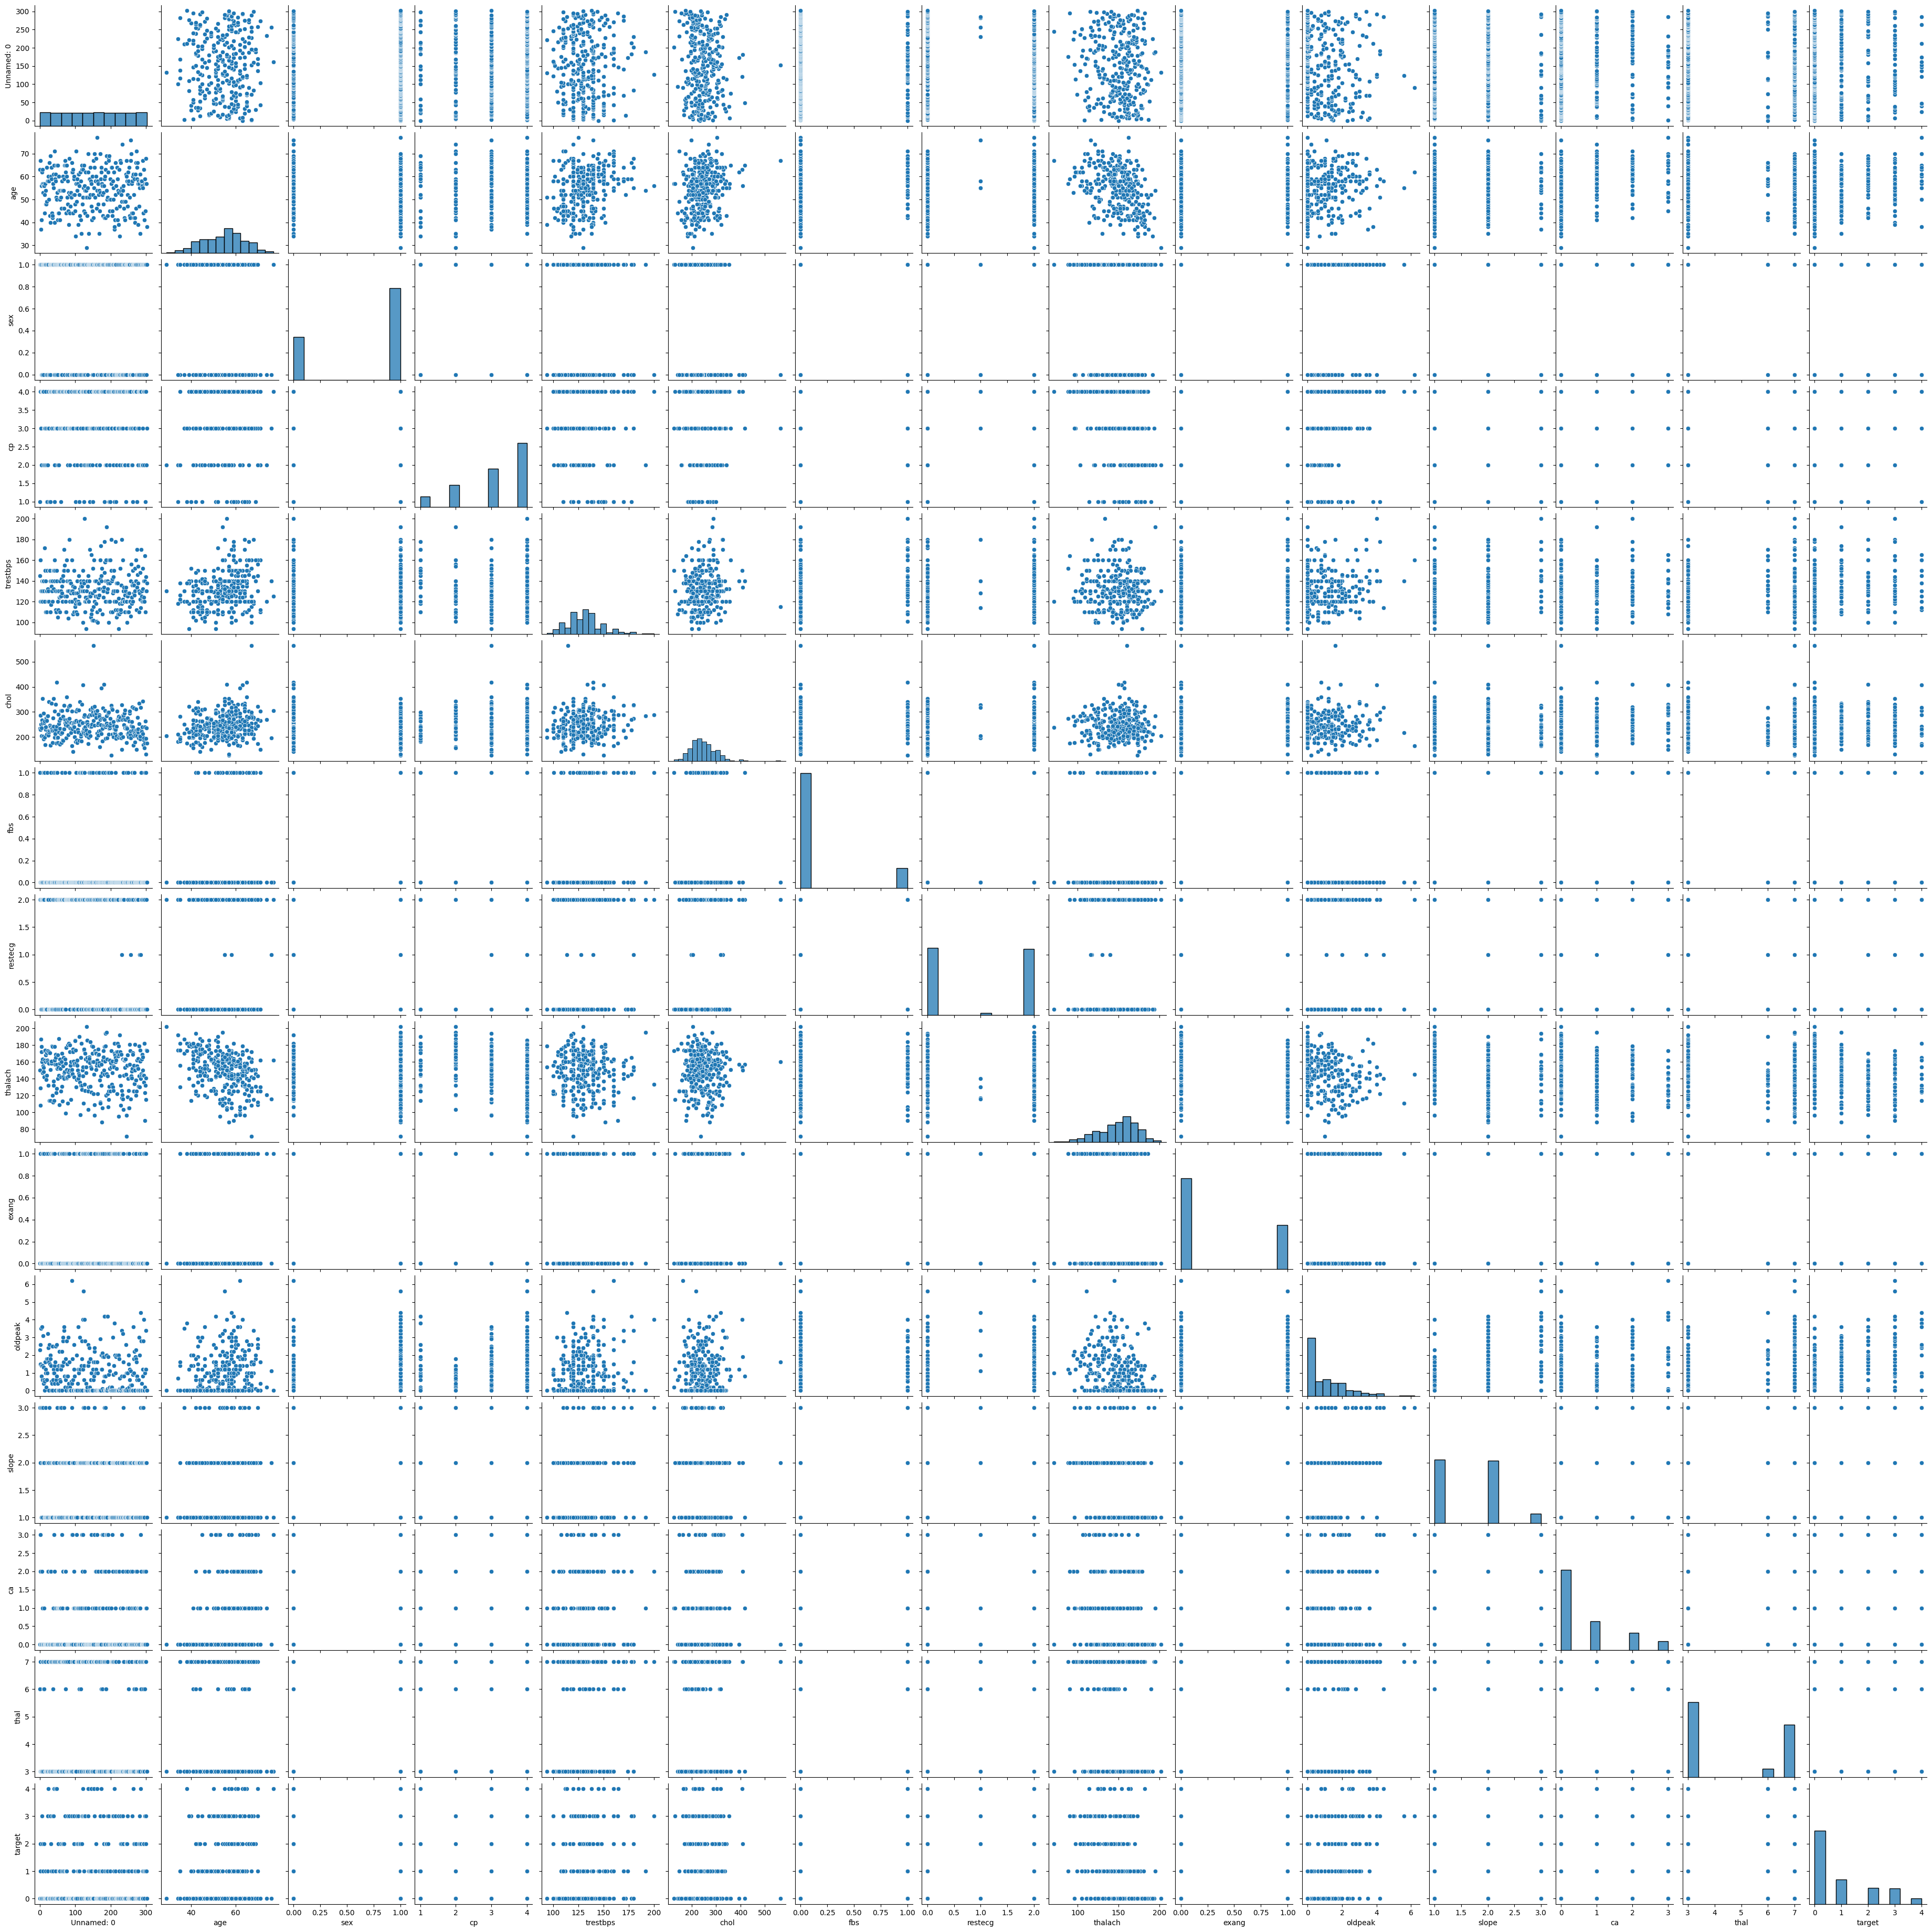

In [3]:
# pairplot to check the correlation
sns.pairplot(df)

In [4]:
# read in the index file
with open('experiments.pkl', 'rb') as f:
    inds = pkl.load(f)

# shuffle the dataframe according to the index, and
# split the dataframe into 0.8/0.2 train-test sets.
train_inds, test_inds = inds[:int(0.8*len(inds))], inds[int(0.8*len(inds)):]
df_train, df_test = df.iloc[train_inds], df.iloc[test_inds]

# convert the target value to {-1, 1}
# target value: 0-healthy, 1,2,3,4-high risk of heart disease
df_train['target'] = df_train['target'].apply(lambda x: -1 if x == 0 else 1)
df_test['target'] = df_test['target'].apply(lambda x: -1 if x == 0 else 1)

/var/folders/kz/k0_p6dhx0lb5myxy10_thxxw0000gn/T/ipykernel_64621/2167002152.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['target'] = df_train['target'].apply(lambda x: -1 if x == 0 else 1)
/var/folders/kz/k0_p6dhx0lb5myxy10_thxxw0000gn/T/ipykernel_64621/2167002152.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['target'] = df_test['target'].apply(lambda x: -1 if x == 0 else 1)


In [5]:
# scale the data (train & test) using the sklearn StandardScaler. 
scaler = StandardScaler()
X_train = scaler.fit_transform(df_train.drop('target', axis=1))
X_test = scaler.transform(df_test.drop('target', axis=1))
y_train = df_train['target'].values.reshape(-1, 1)
y_test = df_test['target'].values.reshape(-1, 1)
print(X_train.shape)
print(y_train)

(242, 14)
[[-1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [-1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [-1]


## Model Training and Simple Evaluation

In [6]:
# logistic regression
# upload your logistic_regression.py 
from logisitic_regression import LogisticReg


# create the model
lr_model = LogisticReg(indim = X_train.shape[1])

# train the model
lr_model.fit(X_train, y_train, lr = 0.001, max_iters=100000, eps = 1e-7)

# test results
test_preds = lr_model.predict(X_test, threshold = 0.5)

(15, 1)


ValueError: shapes (242,1) and (242,15) not aligned: 1 (dim 1) != 242 (dim 0)

In [ ]:
# report the training and testing accuracies
plt.plot(losses_train, label='Train')
plt.plot(losses_test, label='Test')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Initialize lists to store losses and accuracies for different learning rates
losses = []
accuracies = []

# List of learning rates
lrs = [0.1, 0.01, 0.001, 0.0001]

# Train the model for each learning rate
for lr in lrs:
    model = LogisticReg()
    
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []
    
    for epoch in range(10000):
        grad = model.compute_grad(X_train, y_train)
        model.update(grad, lr)
        
        # Calculate loss
        train_loss = model.compute_loss(X_train, y_train)
        test_loss = model.compute_loss(X_test, y_test)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        
        # Calculate accuracy
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        train_acc = np.mean(train_pred == y_train)
        test_acc = np.mean(test_pred == y_test)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)
    
    # Store losses and accuracies
    losses.append((train_losses, test_losses))
    accuracies.append((train_accuracies, test_accuracies))
    
# Plot loss and accuracy trajectories for each learning rate
for i, lr in enumerate(lrs):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(losses[i][0], label='Train Loss')
    plt.plot(losses[i][1], label='Test Loss')
    plt.title(f'Loss Trajectory for lr={lr}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(accuracies[i][0], label='Train Accuracy')
    plt.plot(accuracies[i][1], label='Test Accuracy')
    plt.title(f'Accuracy Trajectory for lr={lr}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

## Classification Metrics

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

from logisitic_regression import LogisticReg


# create the model
lr_model = LogisticReg(indim = X_train.shape[1])

y_pred = lr_model.predict(X_test, threshold = 0.5)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: \n", cm)
# F1 Score
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(y_test)
print("F1 Score: ", f1)
print(y_pred)


# Other metrics
from sklearn.metrics import roc_curve, auc

y_score = lr_model.predict_prob(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Further analysis and improvement. 